## Introduction

**Multiple Linear Regression** uses two ore more independent variables to predict the values of the dependent variable. It is based on the following equation:

$y = b + m_{1}x_{1} + m_{2}x_{2} + ... + m_{n}x_{n}$,

where `m1`, `m2`,...`mn` refer to the coefficients,\
and `b` refers to the intercept that you want to find.

We'll learn multiple linear regression by performing it on StreetEasy Dataset. It contains information about apartments in New York.

[StreetEasy](https://streeteasy.com/) is New York City’s leading real estate marketplace — from studios to high-rises, Brooklyn Heights to Harlem.

We'll be working with a dataset that contains a sample of 5,000 rentals listings in Manhattan, Brooklyn, and Queens, active on StreetEasy in June 2016.

It has the following columns:

* `rental_id`: rental ID
* `rent`: price of rent in dollars
* `bedrooms`: number of bedrooms
* `bathrooms`: number of bathrooms
* `size_sqft`: size in square feet
* `min_to_subway`: distance from subway station in minutes
* `floor`: floor number
* `building_age_yrs`: building’s age in years
* `no_fee`: does it have a broker fee? (0 for fee, 1 for no fee)
* `has_roofdeck`: does it have a roof deck? (0 for no, 1 for yes)
* `has_washer_dryer`: does it have washer/dryer in unit? (0/1)
* `has_doorman`: does it have a doorman? (0/1)
* `has_elevator`: does it have an elevator? (0/1)
* `has_dishwasher`: does it have a dishwasher (0/1)
* `has_patio`: does it have a patio? (0/1)
* `has_gym`: does the building have a gym? (0/1)
* `neighborhood`: (ex: Greenpoint)
* `borough`: (ex: Brooklyn)

The dataset is broken into:

* manhattan.csv
* brooklyn.csv
* queens.csv

## Step 1. Load and Inspect Data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

streeteasy = pd.read_csv('manhattan.csv')
df = pd.DataFrame(streeteasy)
print(df.head())

   rental_id   rent  bedrooms  bathrooms  size_sqft  min_to_subway  floor  \
0       1545   2550       0.0          1        480              9    2.0   
1       2472  11500       2.0          2       2000              4    1.0   
2       2919   4500       1.0          1        916              2   51.0   
3       2790   4795       1.0          1        975              3    8.0   
4       3946  17500       2.0          2       4800              3    4.0   

   building_age_yrs  no_fee  has_roofdeck  has_washer_dryer  has_doorman  \
0                17       1             1                 0            0   
1                96       0             0                 0            0   
2                29       0             1                 0            1   
3                31       0             0                 0            1   
4               136       0             0                 0            1   

   has_elevator  has_dishwasher  has_patio  has_gym       neighborhood  \
0     

## Step 2. Split dataset into Training and Test sets

As with most machine learning algorithms, we have to split our dataset into:

* __Training set__: the data used to fit the model
* __Test set__: the data partitioned away at the very start of the experiment (to provide an unbiased evaluation of the model)

In general, putting 80% of data in the training set and 20% of data in the test set is a good place to start. 

In [2]:
from sklearn.model_selection import train_test_split

x = df[['bedrooms', 'bathrooms', 'size_sqft', 'min_to_subway', 
        'floor', 'building_age_yrs', 'no_fee', 'has_roofdeck', 
        'has_washer_dryer', 'has_doorman', 'has_elevator', 
        'has_dishwasher', 'has_patio', 'has_gym']]

y = df.rent

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, test_size=0.2, random_state=6)
print(x_train)
print(x_test)
print(y_train)
print(y_test)

      bedrooms  bathrooms  size_sqft  min_to_subway  floor  building_age_yrs  \
605        0.0          1        615              2   38.0                38   
3165       2.0          2       1231              2   20.0                16   
1302       2.0          2       1500              2   23.0                90   
2123       3.0          2       1825             12   20.0                26   
585        1.0          1        900              2    3.0                52   
...        ...        ...        ...            ...    ...               ...   
618        0.0          1        470              3    3.0                59   
2004       1.0          1        657              1   12.0                29   
227        1.0          1        500              3    2.0               106   
2761       0.0          1        578              4   22.0                47   
2954       4.0          3       2127              4   14.0                10   

      no_fee  has_roofdeck  has_washer_

## Step 3. Build a Linear Regression Model

In [3]:
# import LinearRegression module
from sklearn.linear_model import LinearRegression

# create a LinearRegression model
mlr = LinearRegression()

# fit your data into the model
mlr.fit(x_train, y_train)

# predict y-values from x_test
y_predict = mlr.predict(x_test)

# test
sonny_apartment = [[1, 1, 620, 16, 1, 98, 1, 0, 1, 0, 0, 1, 1, 0]]

predict_sonny = mlr.predict(sonny_apartment)
print('Predicted rent: $%.2f' % predict_sonny)

Predicted rent: $2393.58


## Step 4. Visualizing Results with Matplotlib

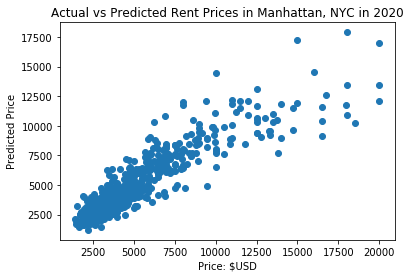

In [4]:
plt.scatter(y_test, y_predict)
plt.title('Actual vs Predicted Rent Prices in Manhattan, NYC in 2020')
plt.xlabel('Price: $USD')
plt.ylabel('Predicted Price')
plt.show()

In [5]:
# print coefficients used in the model
print(mlr.coef_)

[-302.73009383 1199.3859951     4.79976742  -24.28993151   24.19824177
   -7.58272473 -140.90664773   48.85017415  191.4257324  -151.11453388
   89.408889    -57.89714551  -19.31948556  -38.92369828]


## Step 5. Interpreting graphs

In regression, the independent variables will either have a positive linear relationship to the dependent variable, a negative linear relationship, or no relationship. A negative linear relationship means that as X values *increase*, Y values will _decrease_. Similarly, a positive linear relationship means that as X values increase, Y values will also increase.

Graphically, when you see a downward trend, it means a negative linear relationship exists. When you find an upward trend, it indicates a positive linear relationship. 

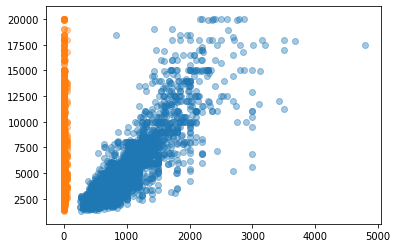

In [6]:
plt.scatter(df[['size_sqft']], df[['rent']], alpha=0.4)
plt.scatter(df.min_to_subway, df.rent, alpha=0.4)
plt.show()

## Step 6. Evaluating the Model's Accuracy

When trying to evaluate the accuracy of our multiple linear regression model, one technique we can use is __Residual Analysis.__

The difference between the actual value `y`, and the predicted value `ŷ` is the __residual e.__ The equation is:

$e = y − ŷ$

`sklearn`'s `linear_model.LinearRegression` comes with a `.score()` method that returns the coefficient of determination __R²__ of the prediction. 

$R² = 1 - \frac{u}{v}$, 

where _u_ is the residual sum of squares:

`((y - y\_predict) ** 2).sum()`

and _v_ is the total sum of squares (TSS):

`((y - y.mean()) ** 2).sum()`

The TSS tells you how much variation there is in the y variable.

R² is the percentage variation in y explained by all the x variables together.

The best possible R² is 1.00 (and it can be negative because the model can be arbitrarily worse). Usually, a R² of 0.70 is considered good.

In [7]:
# find the mean squared error regression loss for the training set
print('Train score:')
print(mlr.score(x_train, y_train))

# find the mean squared error regression loss for the test set
print('Test score:')
print(mlr.score(x_test, y_test))

Train score:
0.7725460559817883
Test score:
0.805037197535764


## Step 7. Rebuild the Model

Now let's rebuild the model using the new features as well as evaluate the new model to see if we improved.

In [8]:
# print out coefficients
print(mlr.coef_)

[-302.73009383 1199.3859951     4.79976742  -24.28993151   24.19824177
   -7.58272473 -140.90664773   48.85017415  191.4257324  -151.11453388
   89.408889    -57.89714551  -19.31948556  -38.92369828]


In [9]:
# remove some of the features that don't have strong 
# correlations and see if your scores improved

x = df[['bedrooms', 'bathrooms', 'size_sqft', 'min_to_subway', 
        'floor', 'building_age_yrs', 'has_roofdeck', 'has_elevator', 
        'has_dishwasher', 'has_patio']]

y = df.rent

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, test_size=0.2, random_state=6)
print(x_train)
print(x_test)
print(y_train)
print(y_test)

# import LinearRegression module
from sklearn.linear_model import LinearRegression

# create a LinearRegression model
mlr = LinearRegression()

# fit your data into the model
mlr.fit(x_train, y_train)

# predict y-values from x_test
y_predict = mlr.predict(x_test)

# find the mean squared error regression loss for the 
# training set
print('Train score:')
print(mlr.score(x_train, y_train))

# find the mean squared error regression loss for the
# testing set
print('Test score:')
print(mlr.score(x_test, y_test))


      bedrooms  bathrooms  size_sqft  min_to_subway  floor  building_age_yrs  \
605        0.0          1        615              2   38.0                38   
3165       2.0          2       1231              2   20.0                16   
1302       2.0          2       1500              2   23.0                90   
2123       3.0          2       1825             12   20.0                26   
585        1.0          1        900              2    3.0                52   
...        ...        ...        ...            ...    ...               ...   
618        0.0          1        470              3    3.0                59   
2004       1.0          1        657              1   12.0                29   
227        1.0          1        500              3    2.0               106   
2761       0.0          1        578              4   22.0                47   
2954       4.0          3       2127              4   14.0                10   

      has_roofdeck  has_elevator  has_d

# Review

* __Multiple Linear Regression__ uses two or more variables to make predictions about another variable

* Multiple linear regression uses a set of independent variables and a dependent variable. It uses these variables to learn how to find optimal parameters. It takes a labeled dataset and learns from it. Once we confirm that it learns correctly, we can then use it to make predictions.

* We can use scikit_learn's `LinearRegression()` to perform multiple linear regression.

* __Residual Analysis__ is used to evaluate the regression model's accuracy. In other words, it's used to see if the model has learned the coefficients correctly. 

* Scikit-learn's `linear_model.LinearRegression` comes with a `.score()` method that returns the coefficient of determination R² on the prediction. The best score is 1.0

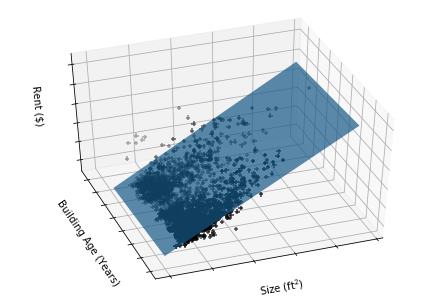

In [10]:
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

streeteasy = pd.read_csv("https://raw.githubusercontent.com/sonnynomnom/Codecademy-Machine-Learning-Fundamentals/master/StreetEasy/manhattan.csv")

df = pd.DataFrame(streeteasy)

x = df[['size_sqft','building_age_yrs']]
y = df[['rent']]

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.8, test_size = 0.2, random_state=6)

ols = LinearRegression()

ols.fit(x_train, y_train)

# plot the figure
fig = plt.figure(1, figsize=(6, 4))
plt.clf()

elev = 43.5
azim = -110

ax = Axes3D(fig, elev=elev, azim=azim)

ax.scatter(x_train[['size_sqft']], x_train[['building_age_yrs']], y_train, c='k', marker='+')

ax.plot_surface(np.array([[0, 0], [4500, 4500]]), np.array([[0, 140], [0, 140]]), ols.predict(np.array([[0, 0, 4500, 4500], [0, 140, 0, 140]]).T).reshape((2, 2)), alpha=.7)

ax.set_xlabel('Size (ft$^2$)')
ax.set_ylabel('Building Age (Years)')
ax.set_zlabel('Rent ($)')

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])


plt.show()